# Classificador de vozes Fuzzy 


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Classificador-de-vozes-Fuzzy" data-toc-modified-id="Classificador-de-vozes-Fuzzy-1">Classificador de vozes Fuzzy</a></span><ul class="toc-item"><li><span><a href="#Classificador-Fuzzy" data-toc-modified-id="Classificador-Fuzzy-1.1">Classificador Fuzzy</a></span><ul class="toc-item"><li><span><a href="#Variáveis-de-Entrada" data-toc-modified-id="Variáveis-de-Entrada-1.1.1">Variáveis de Entrada</a></span></li><li><span><a href="#Base-de-Regras" data-toc-modified-id="Base-de-Regras-1.1.2">Base de Regras</a></span></li><li><span><a href="#Inferência-Fuzzy" data-toc-modified-id="Inferência-Fuzzy-1.1.3">Inferência Fuzzy</a></span></li><li><span><a href="#Fluxo-Wang-Mendel" data-toc-modified-id="Fluxo-Wang-Mendel-1.1.4">Fluxo Wang-Mendel</a></span></li></ul></li><li><span><a href="#Referencias" data-toc-modified-id="Referencias-1.2">Referencias</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white", color_codes=True)
%matplotlib inline

#importando dados para utilização
my_data = np.genfromtxt('voice.csv', delimiter=',')


## Classificador Fuzzy

### Variáveis de Entrada

In [2]:
resolution = 0.0001 #resoluçao alta devido a baixa variação dos valores

#Como todos os valores estão normalizados criaremos variaveis discretas entre 0 e 1
meanfreq = np.arange(0, 1+resolution, resolution)
sd       = np.arange(0, 1+resolution, resolution)
median   = np.arange(0, 1+resolution, resolution)
entropy  = np.arange(0, 1+resolution, resolution)
label    = np.arange(0, 1+resolution, resolution)

In [3]:
#Definindo constantes para os nomes para reutilização em graficos e maps
MEAN_LO = 'Média Baixa'
MEAN_ML = 'Média Média Baixa'
MEAN_M  = 'Média Média'
MEAN_MH = 'Média Média Alta'
MEAN_HI = 'Média Alta'

SD_LO = 'Desvio Baixo'
SD_ML = 'Desvio Médio Baixo'
SD_M  = 'Desvio Médio'
SD_MH = 'Desvio Médio Alto'
SD_HI = 'Desvio Alto'

MED_LO = 'Mediana Baixa'
MED_ML = 'Mediana Média Baixa'
MED_M  = 'Mediana Média'
MED_MH = 'Mediana Média Alta'
MED_HI = 'Mediana Alta'

ENT_LO = 'Entropia Baixa'
ENT_ML = 'Entropia Média Baixa'
ENT_M  = 'Entropia Média'
ENT_MH = 'Entropia Média Alta'
ENT_HI = 'Entropia Alta'

LABL_M  = 'Voz Masculina'
LABL_F  = 'Voz Feminina'

In [4]:
#Gerando os conjuntos fuzzy uniformemente
mean_lo = fuzz.trimf(meanfreq,[0,0,0.25])
mean_ml = fuzz.trimf(meanfreq,[0,0.25,0.5])
mean_m  = fuzz.trimf(meanfreq,[0.25,0.5,0.75])
mean_mh = fuzz.trimf(meanfreq,[0.5,0.75,1])
mean_hi = fuzz.trimf(meanfreq,[0.75,1,1 ])

sd_lo = fuzz.trimf(sd,[0,0,0.25])
sd_ml = fuzz.trimf(sd,[0,0.25,0.5])
sd_m  = fuzz.trimf(sd,[0.25,0.5,0.75])
sd_mh = fuzz.trimf(sd,[0.5,0.75,1])
sd_hi = fuzz.trimf(sd,[0.75,1,1 ])

med_lo = fuzz.trimf(median,[0,0,0.25])
med_ml = fuzz.trimf(median,[0,0.25,0.5])
med_m  = fuzz.trimf(median,[0.25,0.5,0.75])
med_mh = fuzz.trimf(median,[0.5,0.75,1])
med_hi = fuzz.trimf(median,[0.75,1,1 ])

ent_lo = fuzz.trimf(entropy,[0,0,0.25])
ent_ml = fuzz.trimf(entropy,[0,0.25,0.5])
ent_m  = fuzz.trimf(entropy,[0.25,0.5,0.75])
ent_mh = fuzz.trimf(entropy,[0.5,0.75,1])
ent_hi = fuzz.trimf(entropy,[0.75,1,1 ])

labl_m  = fuzz.trapmf(label,[0,0,0.49,0.5])
labl_f  = fuzz.trapmf(label,[0.5,0.51,1,1])


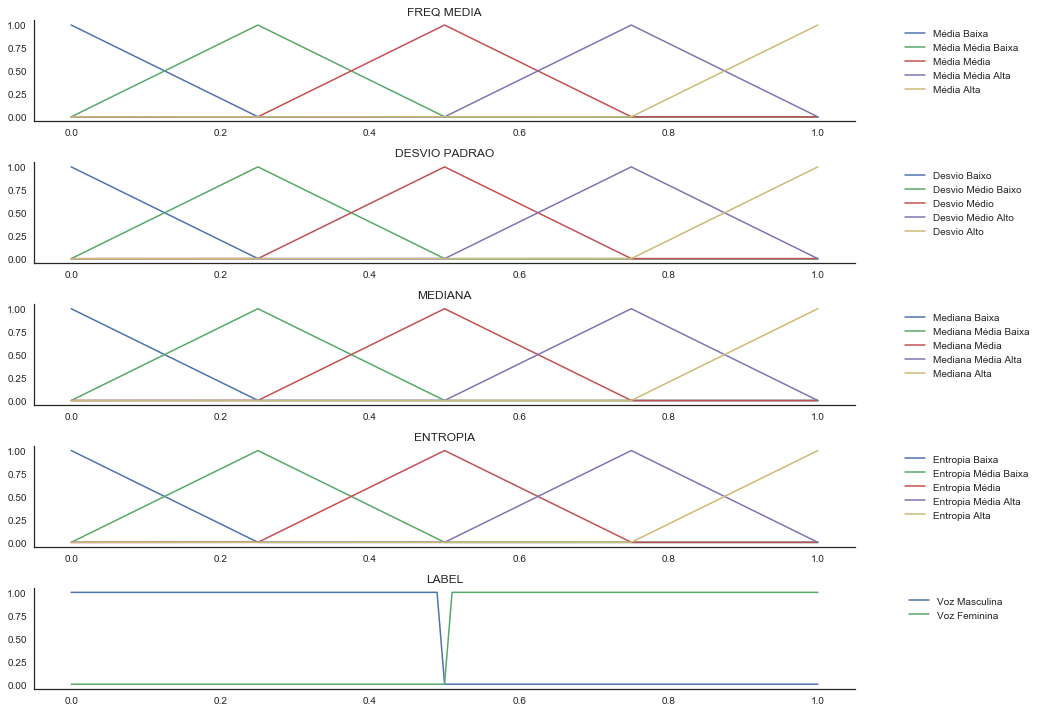

In [5]:
#Visualizando as variáveis criadas
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows=5, figsize=(12, 10))

ax0.plot(meanfreq, mean_lo, 'b', linewidth=1.5, label=MEAN_LO)
ax0.plot(meanfreq, mean_ml, 'g', linewidth=1.5, label=MEAN_ML)
ax0.plot(meanfreq, mean_m , 'r', linewidth=1.5, label=MEAN_M)
ax0.plot(meanfreq, mean_mh, 'm', linewidth=1.5, label=MEAN_MH)
ax0.plot(meanfreq, mean_hi, 'y', linewidth=1.5, label=MEAN_HI)
ax0.set_title('FREQ MEDIA')
ax0.legend(bbox_to_anchor=(1.05, 1))

ax1.plot(sd, sd_lo, 'b', linewidth=1.5, label=SD_LO)
ax1.plot(sd, sd_ml, 'g', linewidth=1.5, label=SD_ML)
ax1.plot(sd, sd_m , 'r', linewidth=1.5, label=SD_M)
ax1.plot(sd, sd_mh, 'm', linewidth=1.5, label=SD_MH)
ax1.plot(sd, sd_hi, 'y', linewidth=1.5, label=SD_HI)
ax1.set_title('DESVIO PADRAO')
ax1.legend(bbox_to_anchor=(1.05, 1))

ax2.plot(median, med_lo, 'b', linewidth=1.5, label=MED_LO)
ax2.plot(median, med_ml, 'g', linewidth=1.5, label=MED_ML)
ax2.plot(median, med_m , 'r', linewidth=1.5, label=MED_M)
ax2.plot(median, med_mh, 'm', linewidth=1.5, label=MED_MH)
ax2.plot(median, med_hi, 'y', linewidth=1.5, label=MED_HI)
ax2.set_title('MEDIANA')
ax2.legend(bbox_to_anchor=(1.05, 1))

ax3.plot(entropy, ent_lo, 'b', linewidth=1.5, label=ENT_LO)
ax3.plot(entropy, ent_ml, 'g', linewidth=1.5, label=ENT_ML)
ax3.plot(entropy, ent_m , 'r', linewidth=1.5, label=ENT_M)
ax3.plot(entropy, ent_mh, 'm', linewidth=1.5, label=ENT_MH)
ax3.plot(entropy, ent_hi, 'y', linewidth=1.5, label=ENT_HI)
ax3.set_title('ENTROPIA')
ax3.legend(bbox_to_anchor=(1.05, 1))

ax4.plot(label, labl_m, 'b', linewidth=1.5, label=LABL_M)
ax4.plot(label, labl_f, 'g', linewidth=1.5, label=LABL_F)
ax4.set_title('LABEL')
ax4.legend(bbox_to_anchor=(1.19, 1))



# Turn off top/right axes
for ax in (ax0, ax1, ax2, ax3, ax4):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()
fig.savefig('fuzzy-sets.png')

### Base de Regras

In [6]:
def generate_rule_base(dataset):
    """
    Método para gerar uma base de regras com base nas entradas
    Para cada entrada:
        1. obter o valor de ativação para cada função de pertinencia
        2. selecionar as maiores ativações de cada variável fuzzy
        3. gerar uma regra com as funcoes ativadas
        4. o valor de ativação dessa regra será o mínimo das ativações(norma-T)
    """
    
    #A base de resgras ficará da seguinte forma {(antecedentes):(consequente, ativaçao)}
    rule_base = {}
    for index, row in dataset.iterrows():
        medfreq_val = row['meanfreq']
        sd_val      = row['sd']
        median_val  = row['median']
        entropy_val = row['sp.ent']
        label_val   = LABL_M if row['label'] == 0 else LABL_F
        
        #Obtendo os valores de ativacao. Guarda em um array o par(funcao,ativacao) e depois pega o de maior valor
        actvs_meanfreq = []
        actvs_meanfreq.append((MEAN_LO, fuzz.interp_membership(meanfreq, mean_lo, medfreq_val)))
        actvs_meanfreq.append((MEAN_ML, fuzz.interp_membership(meanfreq, mean_ml, medfreq_val)))
        actvs_meanfreq.append((MEAN_M , fuzz.interp_membership(meanfreq, mean_m , medfreq_val)))
        actvs_meanfreq.append((MEAN_MH, fuzz.interp_membership(meanfreq, mean_mh, medfreq_val)))
        actvs_meanfreq.append((MEAN_HI, fuzz.interp_membership(meanfreq, mean_hi, medfreq_val)))
        actvs_meanfreq.sort(key=lambda var: var[1], reverse=True) #ordenando do maior para o menor
        activation_meanfreq = actvs_meanfreq[0]
        
        actvs_sd = []
        actvs_sd.append((SD_LO, fuzz.interp_membership(sd, sd_lo, sd_val)))
        actvs_sd.append((SD_ML, fuzz.interp_membership(sd, sd_ml, sd_val)))
        actvs_sd.append((SD_M , fuzz.interp_membership(sd, sd_m , sd_val)))
        actvs_sd.append((SD_MH, fuzz.interp_membership(sd, sd_mh, sd_val)))
        actvs_sd.append((SD_HI, fuzz.interp_membership(sd, sd_hi, sd_val)))
        actvs_sd.sort(key=lambda var: var[1], reverse=True) #ordenando do maior para o menor
        activation_sd = actvs_sd[0]
        
        actvs_median = []
        actvs_median.append((MED_LO, fuzz.interp_membership(median, med_lo, median_val)))
        actvs_median.append((MED_ML, fuzz.interp_membership(median, med_ml, median_val)))
        actvs_median.append((MED_M , fuzz.interp_membership(median, med_m , median_val)))
        actvs_median.append((MED_MH, fuzz.interp_membership(median, med_mh, median_val)))
        actvs_median.append((MED_HI, fuzz.interp_membership(median, med_hi, median_val)))
        actvs_median.sort(key=lambda var: var[1], reverse=True) #ordenando do maior para o menor
        activation_median = actvs_median[0]
        
        actvs_entropy = []
        actvs_entropy.append((ENT_LO, fuzz.interp_membership(entropy, ent_lo, entropy_val)))
        actvs_entropy.append((ENT_ML, fuzz.interp_membership(entropy, ent_ml, entropy_val)))
        actvs_entropy.append((ENT_M , fuzz.interp_membership(entropy, ent_m , entropy_val)))
        actvs_entropy.append((ENT_MH, fuzz.interp_membership(entropy, ent_mh, entropy_val)))
        actvs_entropy.append((ENT_HI, fuzz.interp_membership(entropy, ent_hi, entropy_val)))
        actvs_entropy.sort(key=lambda var: var[1], reverse=True) #ordenando do maior para o menor
        activation_entropy = actvs_entropy[0]
        
        #norma-T(min) para obter a ativaçao da regra
        activation_rule = min(
            activation_meanfreq[1],
            activation_sd[1],
            activation_median[1],
            activation_entropy[1]
        )
        
        #Criando os valores para inserir na base de regras
        rule_key = (
            activation_meanfreq[0],
            activation_sd[0],
            activation_median[0],
            activation_entropy[0]
            )
        rule_value = (label_val, activation_rule)
        
        #Inserindo na base de regras
        if rule_key in rule_base:
            #Mantém o de maior valor
            if rule_value[1] > rule_base[rule_key][1]:
                rule_base[rule_key] = rule_value
        else:
            rule_base[rule_key] = rule_value
            
    return rule_base

### Inferência Fuzzy

In [7]:
def fuzzify(data, rule_base):
    '''
    Recebe uma row do panda.Dataframe como parâmetro e a base de regras gerada
    '''
    medfreq_val = data['meanfreq']
    sd_val      = data['sd']
    median_val  = data['median']
    entropy_val = data['sp.ent']
    label_val   = LABL_M if data['label'] == 0 else LABL_F
    
    #Realiza o cálculo das ativações guardando no formato {antecedente:ativacao}
    activations = {}
    
    activations[MEAN_LO] = fuzz.interp_membership(meanfreq, mean_lo, medfreq_val)
    activations[MEAN_ML] = fuzz.interp_membership(meanfreq, mean_ml, medfreq_val)
    activations[MEAN_M]  = fuzz.interp_membership(meanfreq, mean_m , medfreq_val)
    activations[MEAN_MH] = fuzz.interp_membership(meanfreq, mean_mh, medfreq_val)
    activations[MEAN_HI] = fuzz.interp_membership(meanfreq, mean_hi, medfreq_val)
    
    activations[SD_LO] = fuzz.interp_membership(sd, sd_lo, sd_val)
    activations[SD_ML] = fuzz.interp_membership(sd, sd_ml, sd_val)
    activations[SD_M]  = fuzz.interp_membership(sd, sd_m , sd_val)
    activations[SD_MH] = fuzz.interp_membership(sd, sd_mh, sd_val)
    activations[SD_HI] = fuzz.interp_membership(sd, sd_hi, sd_val)
    
    activations[MED_LO] = fuzz.interp_membership(median, med_lo, median_val)
    activations[MED_ML] = fuzz.interp_membership(median, med_ml, median_val)
    activations[MED_M]  = fuzz.interp_membership(median, med_m , median_val)
    activations[MED_MH] = fuzz.interp_membership(median, med_mh, median_val)
    activations[MED_HI] = fuzz.interp_membership(median, med_hi, median_val)
    
    activations[ENT_LO] = fuzz.interp_membership(entropy, ent_lo, entropy_val)
    activations[ENT_ML] = fuzz.interp_membership(entropy, ent_ml, entropy_val)
    activations[ENT_M]  = fuzz.interp_membership(entropy, ent_m , entropy_val)
    activations[ENT_MH] = fuzz.interp_membership(entropy, ent_mh, entropy_val)
    activations[ENT_HI] = fuzz.interp_membership(entropy, ent_hi, entropy_val)
    
    #Realizar as inferencias na base de regras e guarda numa lista as regras ativadas
    rules_activated = []
    for antecendentes,consequente in rule_base.items():
        mean_name, sd_name, med_name, ent_name = antecendentes
        value = labl_m if consequente[0] == LABL_M else labl_f
        if(activations[mean_name] != 0 
           and activations[sd_name] != 0 
           and activations[med_name] != 0 
           and activations[ent_name] != 0):
            rule_activation = min(activations[mean_name],activations[sd_name],activations[med_name],activations[ent_name])
            rule_activated = np.fmin(rule_activation, value) #faz clipping do conjunto de saida
            rules_activated.append(rule_activated)
        
    #Combinando todas as saidas encontradas
    aggregated = 0
    for rule in rules_activated:
        aggregated = np.fmax(aggregated,rule)
    
    return aggregated
    

In [8]:
def defuzzify(fuzzy_aggregated, method = 'centroid'):
    return fuzz.defuzz(label, fuzzy_aggregated, method)

### Fluxo Wang-Mendel

![flow](img/flow.png)

In [9]:
#importando dados para vizualização
voice = pd.read_csv("voice.csv")

meanfreq_data = voice["meanfreq"].values
sd_data = voice["sd"].values
median_data = voice["median"].values
entropy_data = voice["sp.ent"].values
label_data = voice["label"].values

voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0


In [10]:
train, test = train_test_split(voice, test_size=0.2)

In [11]:
rule_base = generate_rule_base(train)
#Visualizando regras
rules = []
for k,v in rule_base.items():
    r=list(k)
    r.append(v[0])
    rules.append(r)
pd.DataFrame(rules,columns=['meanfreq', 'sd', 'median', 'sp.ent', 'label'])

,meanfreq,sd,median,sp.ent,label
0,Média Média Baixa,Desvio Baixo,Mediana Média Baixa,Entropia Média Alta,Voz Feminina
1,Média Média Baixa,Desvio Baixo,Mediana Média Baixa,Entropia Alta,Voz Feminina
2,Média Média Baixa,Desvio Baixo,Mediana Baixa,Entropia Alta,Voz Masculina
3,Média Baixa,Desvio Baixo,Mediana Baixa,Entropia Média Alta,Voz Masculina
4,Média Baixa,Desvio Baixo,Mediana Baixa,Entropia Alta,Voz Masculina
5,Média Baixa,Desvio Baixo,Mediana Média Baixa,Entropia Alta,Voz Feminina
6,Média Média Baixa,Desvio Baixo,Mediana Baixa,Entropia Média Alta,Voz Masculina
7,Média Baixa,Desvio Baixo,Mediana Média Baixa,Entropia Média Alta,Voz Masculina


In [12]:
result = []
errors = 0
for index, data in test.iterrows():
    fuzzy_aggregated = fuzzify(data, rule_base)
    label_found = 1 if defuzzify(fuzzy_aggregated,'centroid') > 0.5 else 0
    result.append([label_found,int(data['label'])])
    if(int(label_found != data['label'])):
        errors += 1
result_df = pd.DataFrame(result,columns=['encontrado','real'])
result_df

,encontrado,real
0,1,1
1,1,1
2,1,1
3,1,1
4,1,0
5,1,0
6,1,0
7,1,1
8,1,0
9,1,0


In [14]:
print("ERROS: {} | PRECISAO: {}%".format(errors, 100 - errors*100/result_df['encontrado'].count()))

ERROS: 306 | PRECISAO: 51.73501577287066%


## Referencias
Dataset: https://www.kaggle.com/primaryobjects/voicegender/data  
Data visualization: https://www.kaggle.com/zhiboyang/data-visualization  
Trabalho semelhante: https://github.com/johntheo/MESTRADO/blob/master/notebooks/inteligencia_artificial/Trabalho-Fuzzy.ipynb 